#### 다중분류를 위한 OvR(OvA)
- 분류 클래스 수 만큼 2진 분류기를 생성하여 다중 분류를 진행함.

In [37]:
### 모듈로딩
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.5f}'.format

# 데이터셋 load_digits
# 내장 데이터셋임
# 이미지 데이터임 -> 8 * 8 크기 이미지 -> 1D으로 64개 피쳐
# 이미지 라벨/타겟 -> 숫자 0 ~ 9 까지 있음. 총 10개의 클래스가 나옴
# 흑백 이미지임

## 데이터 로딩
featuredf, target = load_digits(as_frame=True, return_X_y=True)
print(featuredf.shape, featuredf.ndim, target.shape, target.ndim)

featuredf = featuredf/255

print(featuredf.head(), target.head())

(1797, 64) 2 (1797,) 1
   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0    0.00000    0.00000    0.01961    0.05098    0.03529    0.00392   
1    0.00000    0.00000    0.00000    0.04706    0.05098    0.01961   
2    0.00000    0.00000    0.00000    0.01569    0.05882    0.04706   
3    0.00000    0.00000    0.02745    0.05882    0.05098    0.00392   
4    0.00000    0.00000    0.00000    0.00392    0.04314    0.00000   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0    0.00000    0.00000    0.00000    0.00000  ...    0.00000    0.00000   
1    0.00000    0.00000    0.00000    0.00000  ...    0.00000    0.00000   
2    0.00000    0.00000    0.00000    0.00000  ...    0.01961    0.00000   
3    0.00000    0.00000    0.00000    0.03137  ...    0.03529    0.00000   
4    0.00000    0.00000    0.00000    0.00000  ...    0.00000    0.00000   

   pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0    0.00000    0.0000

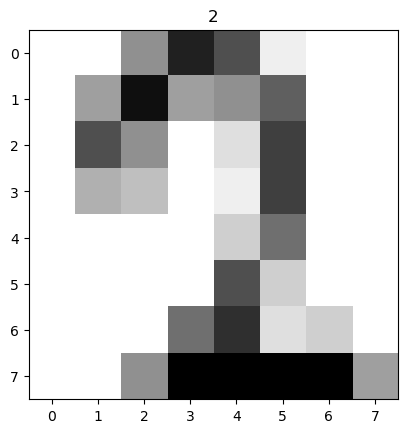

In [38]:
## 이미지 데이터 시작화
import matplotlib.pyplot as plt

# 1D --> 2D 형태로 변환
imgdata=featuredf.iloc[1400].to_numpy().reshape(-1, 8)
imgdata.shape

# 시각화
plt.imshow(imgdata, cmap='binary')
plt.title(target[1400])
plt.show()

### 학습용 데이터셋 준비 : Trainds, Testds

In [39]:
X_train, X_test, y_train, y_test = train_test_split(featuredf, target, stratify=target, random_state=10)

featuredf.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,...,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000,1797.00000
mean,0.00000,0.00119,0.02041,0.04642,0.04646,0.02267,0.00534,0.00051,0.00002,0.00782,...,0.01461,0.00081,0.00000,0.00110,0.02179,0.04741,0.04631,0.02653,0.00811,0.00143
std,0.00000,0.00356,0.01865,0.01666,0.01681,0.02222,0.01304,0.00407,0.00037,0.01253,...,0.01929,0.00386,0.00009,0.00366,0.02001,0.01716,0.01935,0.02314,0.01604,0.00729
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00392,0.03922,0.03922,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00392,0.04314,0.03922,0.00000,0.00000,0.00000
50%,0.00000,0.00000,0.01569,0.05098,0.05098,0.01569,0.00000,0.00000,0.00000,0.00000,...,0.00392,0.00000,0.00000,0.00000,0.01569,0.05098,0.05490,0.02353,0.00000,0.00000
75%,0.00000,0.00000,0.03529,0.05882,0.05882,0.04314,0.00000,0.00000,0.00000,0.01176,...,0.02745,0.00000,0.00000,0.00000,0.03922,0.06275,0.06275,0.04706,0.00784,0.00000
max,0.00000,0.03137,0.06275,0.06275,0.06275,0.06275,0.06275,0.05882,0.00784,0.06275,...,0.06275,0.05098,0.00392,0.03529,0.06275,0.06275,0.06275,0.06275,0.06275,0.06275


In [45]:
# OvR, OvA
# 클래스마다 이진 분류기 만들어서 가장 높은 결정점수 낸 클래스 선택
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

ovr_clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))
ovr_clf.fit(X_train, y_train)

# 모델 파라미터
print(ovr_clf.estimators_)

print(ovr_clf.classes_)

print(ovr_clf.n_classes_)

for idx in range(ovr_clf.n_classes_):
    print(f'[{idx} 분류기]', ovr_clf.estimators_[idx].coef_, ovr_clf.estimators_[idx].intercept_)

# 확률 예측을 `predict_proba` 대신 `decision_function`으로 대체
decision_scores = ovr_clf.decision_function(X_test.iloc[:2])
print(decision_scores)

# 예측값 출력
proba = ovr_clf.predict_proba(X_test.iloc[:2])
print(proba.max(axis=1))
print(proba.argmax())


[LogisticRegression(max_iter=1000), LogisticRegression(max_iter=1000), LogisticRegression(max_iter=1000), LogisticRegression(max_iter=1000), LogisticRegression(max_iter=1000), LogisticRegression(max_iter=1000), LogisticRegression(max_iter=1000), LogisticRegression(max_iter=1000), LogisticRegression(max_iter=1000), LogisticRegression(max_iter=1000)]
[0 1 2 3 4 5 6 7 8 9]
10
[0 분류기] [[ 0.00000000e+00 -1.17211304e-01 -3.61976716e-01  6.37992922e-01
  -2.59516080e-01 -1.28004235e+00 -5.49554643e-01 -5.15394269e-02
  -2.48867098e-03 -4.50770969e-01  8.75529916e-01  6.75669778e-01
   7.61063082e-01  1.42181524e+00 -3.72707245e-01 -4.79082752e-02
  -8.76059290e-04  4.83967023e-01  1.73526178e+00 -5.66661564e-01
  -1.82795465e+00  2.02796255e+00  6.80700634e-01 -2.29999080e-02
  -2.33809952e-04  1.17166680e+00  1.43124099e+00 -2.77339186e+00
  -4.06945241e+00  6.21786489e-01  1.75117326e+00 -1.03944146e-03
   0.00000000e+00  1.44042261e+00  1.66074394e+00 -3.35466822e+00
  -4.16837941e+00 -1.8